In [64]:
import torch
import torch.nn as nn
import torchvision as tv
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm

In [65]:
trans = tv.transforms.Compose([
	tv.transforms.ToTensor()
])

In [ ]:
ds_mnist = tv.datasets.MNIST(root='data', download=True, transform=trans)

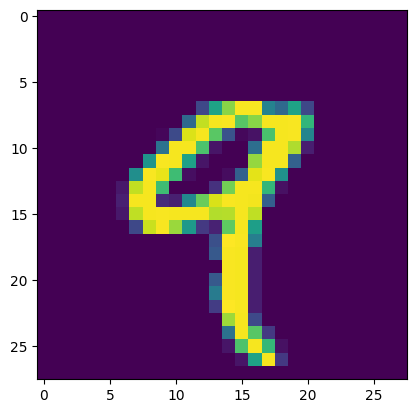

In [67]:
plt.imshow(ds_mnist[4][0].numpy()[0])

In [68]:
dataloader = torch.utils.data.DataLoader(dataset=ds_mnist, batch_size=16, shuffle=True, num_workers=1, drop_last=True)

In [69]:
for img, label in dataloader:
    print(img.shape)
    print(label.shape)
    break

torch.Size([16, 1, 28, 28])
torch.Size([16])


In [70]:
class NeuralNumbers(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.flat = nn.Flatten()
        self.linear1 = nn.Linear(28 * 28, 100)
        self.linear2 = nn.Linear(100, 10)
        self.act = nn.ReLU()
        
    def forward(self, x):
        out = self.flat(x)
        out = self.linear1(out)
        out = self.act(out)
        out = self.linear2(out)
        
        return out

In [71]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [72]:
model = NeuralNumbers()

In [73]:
count_parameters(model)

79510

In [74]:
loss_fn = nn.CrossEntropyLoss()

In [75]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

In [76]:
def accuracy(pred, label):
    answer = F.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1)
    
    return answer.mean()

In [77]:
epochs = 10

for epoch in range(epochs):
    loss_value = 0
    acc_value = 0
    
    for img, label in (pbar := tqdm(dataloader)):
        optimizer.zero_grad()
        
        label = F.one_hot(label, 10).float()
        pred = model(img)
        
        loss = loss_fn(pred, label)
        
        loss.backward()
        loss_item = loss.item()
        loss_value += loss_item
        
        optimizer.step()
        
        acc_current = accuracy(pred, label)
        acc_value += acc_current
        
        pbar.set_description(f'loss: {loss_item:.4e}\taccuracy: {acc_current:.4e}')
    
    print(loss_value / len(dataloader))
    print(acc_value / len(dataloader))

  0%|          | 0/3750 [00:00<?, ?it/s]/tmp/ipykernel_15822/3800270976.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer = F.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1)
loss: 3.8987e-01	accuracy: 9.3750e-01: 100%|██████████| 3750/3750 [00:20<00:00, 179.76it/s]


0.6469201587527991
0.83935


loss: 1.1470e-01	accuracy: 1.0000e+00: 100%|██████████| 3750/3750 [00:21<00:00, 170.79it/s]


0.30895831495573123
0.9121


loss: 1.1093e-01	accuracy: 1.0000e+00: 100%|██████████| 3750/3750 [00:23<00:00, 157.68it/s]


0.2595055186969539
0.9272166666666667


loss: 1.3544e-01	accuracy: 9.3750e-01: 100%|██████████| 3750/3750 [00:24<00:00, 150.88it/s]


0.22642291216601929
0.9369333333333333


loss: 1.5833e-02	accuracy: 1.0000e+00: 100%|██████████| 3750/3750 [00:23<00:00, 161.01it/s]


0.20149991784344118
0.9429833333333333


loss: 2.5278e-01	accuracy: 9.3750e-01: 100%|██████████| 3750/3750 [00:22<00:00, 166.36it/s]


0.1810575129897644
0.9492


loss: 1.0129e-01	accuracy: 1.0000e+00: 100%|██████████| 3750/3750 [00:21<00:00, 173.53it/s]


0.16419485324087243
0.9533166666666667


loss: 3.5472e-01	accuracy: 9.3750e-01: 100%|██████████| 3750/3750 [04:41<00:00, 13.30it/s] 


0.14960960966087877
0.9574


loss: 3.3170e-02	accuracy: 1.0000e+00: 100%|██████████| 3750/3750 [00:26<00:00, 141.85it/s]


0.1376733751072859
0.9610666666666666


loss: 1.5835e-01	accuracy: 9.3750e-01: 100%|██████████| 3750/3750 [00:25<00:00, 149.95it/s]

0.1273587918167313
0.9639166666666666


In [84]:
img = cv2.imread('./uploads/test_img_7.png', cv2.IMREAD_GRAYSCALE)
img = np.expand_dims(img, axis=0)
img = np.expand_dims(img, axis=0)
img = img.astype(np.float32)/255.0

In [85]:
img.shape

(1, 1, 28, 28)

In [86]:
test_img = torch.from_numpy(img)
test_pred = model(test_img)

In [ ]:
F.softmax(test_pred).detach().numpy().argmax()

/tmp/ipykernel_15822/4002220828.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(test_pred).detach().numpy().argmax()


np.int64(5)